In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (4).csv


In [ ]:
# Import our dependencies (libraries)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from pathlib import Path
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os




In [ ]:
#  Import and read the csv file
import pandas as pd 
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**DATA EXPLORATION**

In [ ]:
# To check the data data-types & number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
# Determine the number of unique values in each column
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [ ]:
# statistical summaries for the dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Check for null valumes on each column
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**DATA CLEANING**

*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete/null-value data within a dataset or unnecessary columns irrelavant for the analysis .* 

In [ ]:
# Dropped 'Education' column as it is not related 
df.drop(["education"],axis=1,inplace = True)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#To check for duplicate values
df.duplicated().sum()

0

In [ ]:
# Checking the data set
df.cigsPerDay.describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [ ]:
# Using Median to fill the NAs for 'CigsPerDay' as the values are not continous(Mean#9 & 50%#0.00)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [ ]:
# Identify the mean values for the columns
df.mean()

male                 0.429212
age                 49.584946
currentSmoker        0.494101
cigsPerDay           8.941482
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [ ]:
# To replce the null values with the column mean values, to have a wide dataset
df = df.fillna(df.mean())
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# To check the data data-types & number of rows (No null values now)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [ ]:
# CHD value counts
dist_df = df.TenYearCHD.value_counts().to_frame()
dist_df


,TenYearCHD
0,3594
1,644


Text(0.5, 1.0, 'Distribution of Heart Disease')

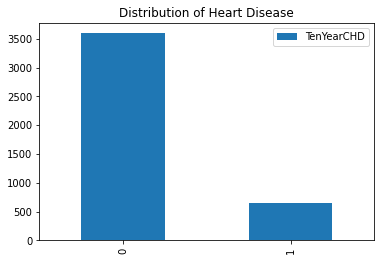

In [ ]:
dist_df.plot.bar()
plt.title("Distribution of Heart Disease")

In [ ]:
# To find the correlation of each column
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.197596,0.315630,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.213748,-0.191847,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.760239,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.315630,-0.191847,0.760239,1.000000,-0.044826,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056650,0.058859
BPMeds,-0.052204,0.121980,-0.048632,-0.044826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032244,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065046,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.036150,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026816,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088375,0.252047,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


**DATA VISUALIZATION**

*Data visualization is the graphical representation of information and data. It provides the viewer easy understanding of the dataset. Commonly visual representation is done using charts, graphs, maps,etc. It provides an easy way to see and understand trends, outliers, and patterns in data.*

In [ ]:
df_counts = df.male.value_counts()
df_counts

0    2419
1    1819
Name: male, dtype: int64

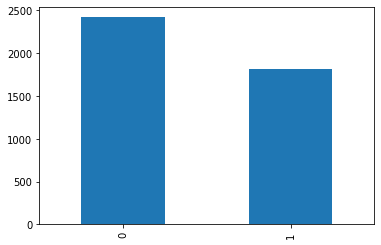

In [ ]:
# Visualize the value counts
df_counts.plot.bar()

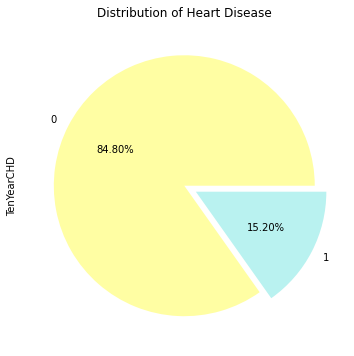

In [ ]:
## Distribution of heart diseases
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title("Distribution of Heart Disease")
df["TenYearCHD"].value_counts().plot(kind="pie",colors= sns.color_palette('pastel')[8:],explode = (0, 0.1) ,autopct='%1.2f%%')

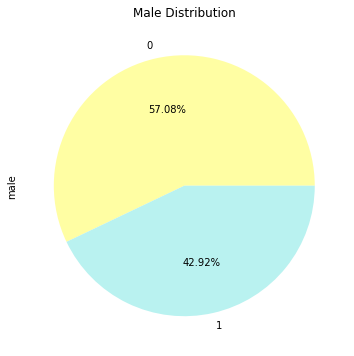

In [ ]:
## Male population distribution
plt.figure(figsize=(6,6))
plt.title("Male Distribution")
df['male'].value_counts().plot(kind="pie",colors= sns.color_palette('pastel')[8:],autopct='%1.2f%%')

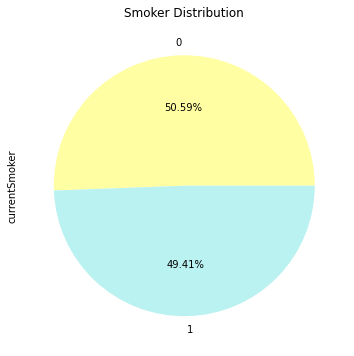

In [ ]:
## Currently Smokers distribution
plt.figure(figsize=(6,6))
plt.title("Smoker Distribution")
df["currentSmoker"].value_counts().plot(kind="pie",colors= sns.color_palette('pastel')[8:],autopct='%1.2f%%')

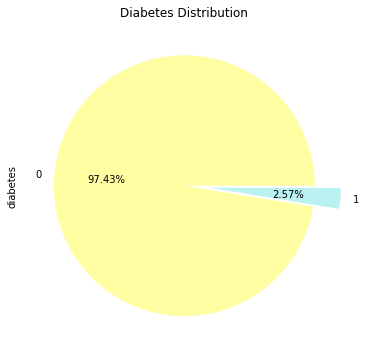

In [ ]:
## Diabetes distribution
plt.figure(figsize=(6,6))
plt.title("Diabetes Distribution")
df["diabetes"].value_counts().plot(kind="pie",colors= sns.color_palette('pastel')[8:],explode = (0, 0.2),autopct='%1.2f%%')

Text(0.5, 1.0, 'Heart Rate impact on Heart Disase')

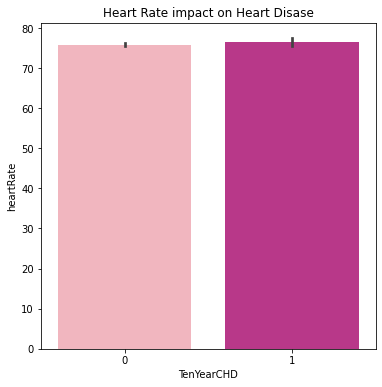

In [ ]:
## bar plot to plot heart disease affect on heart rate
#heart rate doesnot have much impact on heart diseases
import seaborn as sns

plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="heartRate",data=df, palette="RdPu")
plt.title("Heart Rate impact on Heart Disase")

Text(0.5, 1.0, 'Glucose impact on Heart Disase')

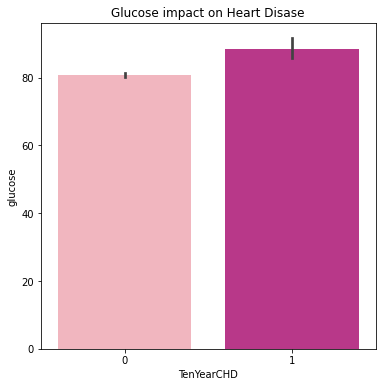

In [ ]:
## bar plot to plot glucose level impact on heart disease
plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="glucose",data=df, palette="RdPu")
plt.title("Glucose impact on Heart Disase")

Text(0.5, 1.0, 'BP impact on Heart Disase')

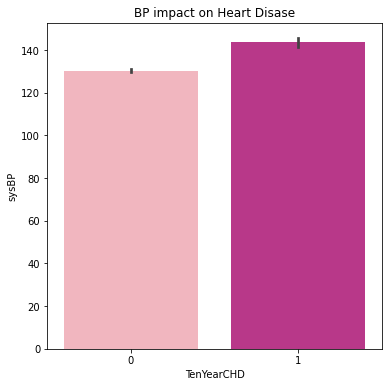

In [ ]:
## bar plot to plot sysBP impact on heart disease
plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="sysBP",data=df, palette="RdPu")
plt.title("BP impact on Heart Disase")

Text(0.5, 1.0, 'BP impact on Heart Disase')

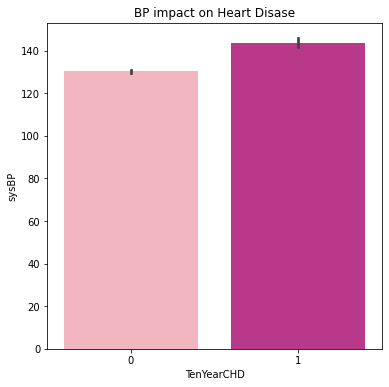

In [ ]:
## bar plot to plot sysBP impact on heart disease
plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="sysBP",data=df, palette="RdPu")
plt.title("BP impact on Heart Disase")

Text(0.5, 1.0, 'Ciagrettes impact on Heart Disase')

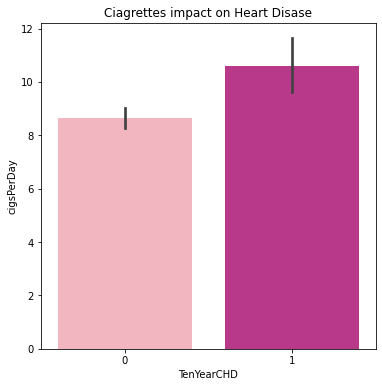

In [ ]:
## bar plot to plot cigs per day impact on heart disease
plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="cigsPerDay",data=df, palette="RdPu")

plt.title("Ciagrettes impact on Heart Disase")

Text(0.5, 1.0, 'Stroke impact on Heart Disase')

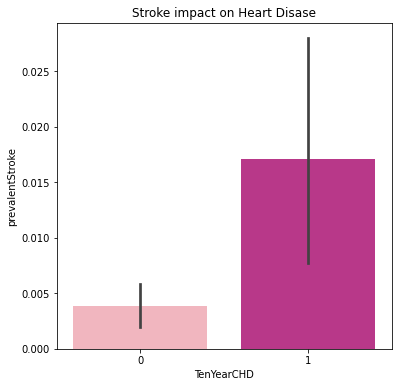

In [ ]:
## bar plot to plot stroke impact on heart disease
#  population suffering from Stroke has higher probability of suffering from heart diseses
plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="prevalentStroke",data=df, palette="RdPu")

plt.title("Stroke impact on Heart Disase")

Text(0.5, 1.0, 'Hypertension impact on Heart Disase')

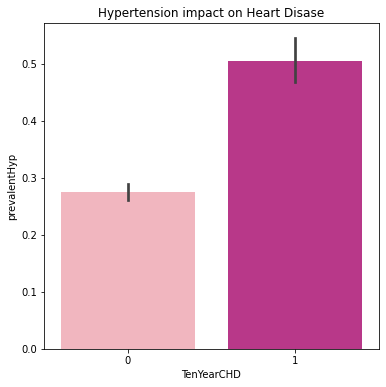

In [ ]:

## bar plot to plot hypertension impact on heart disease
# population suffering from Hypertension have higher chances of having Heart Diseases

plt.figure(figsize=(6,6))
sns.barplot(x="TenYearCHD",y="prevalentHyp",data=df, palette="RdPu")

plt.title("Hypertension impact on Heart Disase")

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for male')

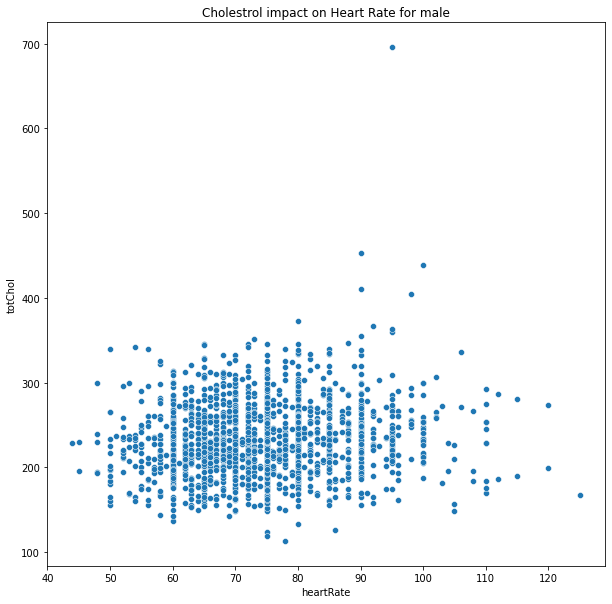

In [ ]:
# he heart rate of the male population keeps on increasing, irrespective of the Cholestrol level.

plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=df[df.male==1])
plt.title("Cholestrol impact on Heart Rate for male")

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for female')

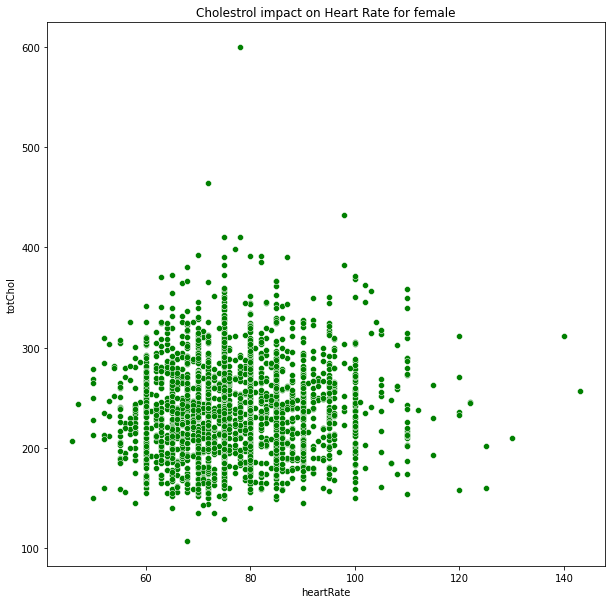

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=df[df.male==0], color="green")
plt.title("Cholestrol impact on Heart Rate for female")

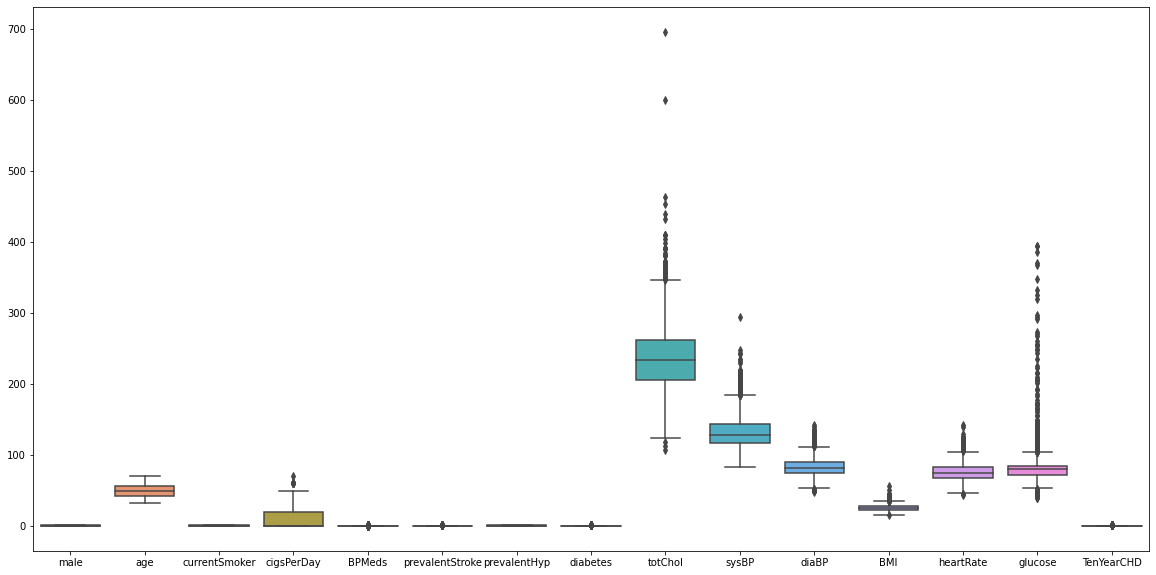

In [ ]:
# Boxplot to see the outliers
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.boxplot(data=df)

**SPLITTING DATA - TRAINING AND TESTING SETS**

*The data is splitted into 2 groups. One for training purpose and teh other for testing purpose.*

In [ ]:
# Importing the required packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, classification_report
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')


#ensembling
# from mlxtend.classifier import StackingCVClassifier

# Defining the variables X & y
X = df.drop(['TenYearCHD'], axis=1)
X = add_constant(X)
y = df['TenYearCHD']

# Split the preprocessed dataset into the Training and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

# Create a StandardScaler instances
scaler =StandardScaler()

# Scaling & fit the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Checking if the data is equally split (if unbalanced or not)
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 1790, 1: 329})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9fb926f70>,
      dtype=object)

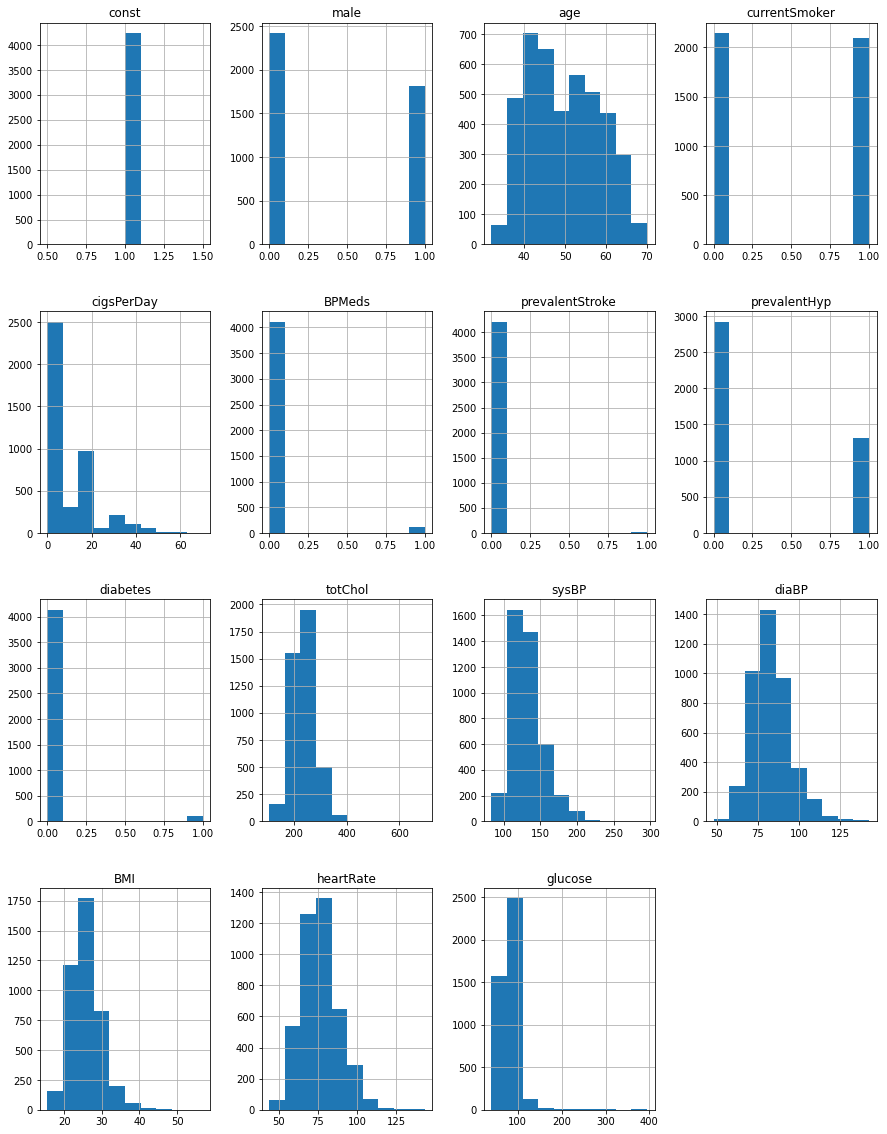

In [ ]:
#Graphical representation on the dataset in histograms 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)

**MACHINE LEARNING MODELS**

**1) LOGISTIC REGRESSION**

*Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.*

In [ ]:
#Logistic Regression
#classifier = LogisticRegression(random_state=0)
#classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#matrix = confusion_matrix(y_test, y_pred)
#print(matrix)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#report = classification_report(y_test, y_pred)
#print(report)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[1788   16]
 [ 292   23]]


Accuracy of Logistic Regression: 85.4648419065597 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1804
           1       0.59      0.07      0.13       315

    accuracy                           0.85      2119
   macro avg       0.72      0.53      0.53      2119
weighted avg       0.82      0.85      0.80      2119



Text(42.0, 0.5, 'predicted label')

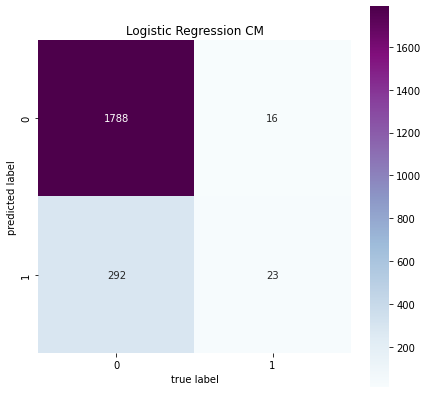

In [ ]:
## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(lr_conf_matrix, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

**2) DECISION TREE MODEL**

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

#classifier = DecisionTreeClassifier(random_state = 0)
#classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

#cm=confusion_matrix(y_test,y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[1765   39]
 [ 290   25]]


Accuracy of DecisionTreeClassifier: 84.47380840018877 

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1804
           1       0.39      0.08      0.13       315

    accuracy                           0.84      2119
   macro avg       0.62      0.53      0.52      2119
weighted avg       0.79      0.84      0.80      2119



**3) RANDOM FOREST**

*The random forest constructs multiple decision trees.*

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
#classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=0,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

#cm=confusion_matrix(y_test,y_pred)
#print(cm)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[1800    4]
 [ 307    8]]


Accuracy of Random Forest: 85.32326569136384 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1804
           1       0.67      0.03      0.05       315

    accuracy                           0.85      2119
   macro avg       0.76      0.51      0.48      2119
weighted avg       0.83      0.85      0.79      2119



**4) SUPPORT VECTOR CLASSIFIER**

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC

m4 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[1791   13]
 [ 295   20]]


Accuracy of Support Vector Classifier: 85.4648419065597 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1804
           1       0.61      0.06      0.11       315

    accuracy                           0.85      2119
   macro avg       0.73      0.53      0.52      2119
weighted avg       0.82      0.85      0.80      2119



**5) NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

m5 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[1683  121]
 [ 250   65]]


Accuracy of Naive Bayes model: 82.49174138744691 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1804
           1       0.35      0.21      0.26       315

    accuracy                           0.82      2119
   macro avg       0.61      0.57      0.58      2119
weighted avg       0.79      0.82      0.81      2119



**6) EXTREME GRADIENT BOOST**

In [ ]:
from xgboost import XGBClassifier

m6 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[1804    0]
 [ 315    0]]


Accuracy of Extreme Gradient Boost: 85.13449740443606 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1804
           1       0.00      0.00      0.00       315

    accuracy                           0.85      2119
   macro avg       0.43      0.50      0.46      2119
weighted avg       0.72      0.85      0.78      2119



**7) K-NEIGHBORSCLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m7 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[1797    7]
 [ 307    8]]


Accuracy of K-NeighborsClassifier: 85.181689476168 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1804
           1       0.53      0.03      0.05       315

    accuracy                           0.85      2119
   macro avg       0.69      0.51      0.48      2119
weighted avg       0.81      0.85      0.79      2119



***Evaluations of the different Models***

In [ ]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Naive Bayes','Extreme Gradient Boost',
                    'K-Nearest Neighbour'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,85.464842
1,Decision Tree,82.491741
2,Random Forest,85.323266
3,Support Vector Machine,85.134497
4,Naive Bayes,85.181689
5,Extreme Gradient Boost,84.473808
6,K-Nearest Neighbour,85.464842


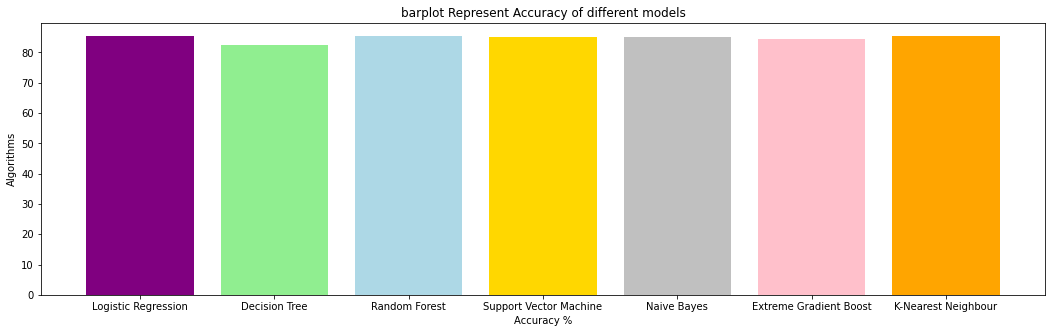

In [ ]:
colors = ['purple','lightgreen','lightblue','gold','silver','pink','orange',]
plt.figure(figsize=(18,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()